In [37]:
## Major Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy 

## Other
import os, joblib, missingno

## sklearn -- Preprocessing & Tuning & Transformation
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector

## sklearn -- metrics
from sklearn.metrics import mean_squared_error, r2_score

## sklearn -- Models
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor

## Xgboost
#from xgboost import XGBRegressor

In [38]:
dataset = pd.read_csv("C:/Users/Mariam/Downloads/1.csv")

dataset.head(5)


,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,NaN,2.092387,0.595157,-1.006017,-0.818221,11.098838
1,NaN,1.765454,-0.474945,0.404982,-0.653329,-71.979700
2,NaN,-1.057711,1.852278,0.822545,-0.013497,66.378121
3,NaN,-1.191303,1.865775,0.656554,0.473833,77.226207
4,NaN,0.091761,0.087047,-1.987569,-0.299007,47.409004


In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  90 non-null     float64
 1   feature_2  100 non-null    float64
 2   feature_3  90 non-null     float64
 3   feature_4  100 non-null    float64
 4   feature_5  100 non-null    float64
 5   target     100 non-null    float64
dtypes: float64(6)
memory usage: 4.8 KB


In [40]:
dataset.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
count,90.000000,100.000000,90.000000,100.000000,100.000000,100.000000
mean,-0.042180,0.128058,0.046685,-0.032202,-0.093874,-1.840722
std,0.937905,0.959556,0.974019,1.072806,0.983943,85.808976
min,-1.952088,-1.913280,-2.301921,-2.619745,-3.241267,-203.110187
25%,-0.786227,-0.536288,-0.634778,-0.757046,-0.700307,-67.344464
50%,-0.010110,0.152465,0.049772,-0.145714,-0.024662,13.553169
75%,0.562895,0.667929,0.676997,0.648170,0.532419,58.022839
max,2.314659,3.078881,1.886186,3.852731,2.122156,224.432777


In [41]:
dataset.isnull().sum()

feature_1    10
feature_2     0
feature_3    10
feature_4     0
feature_5     0
target        0
dtype: int64

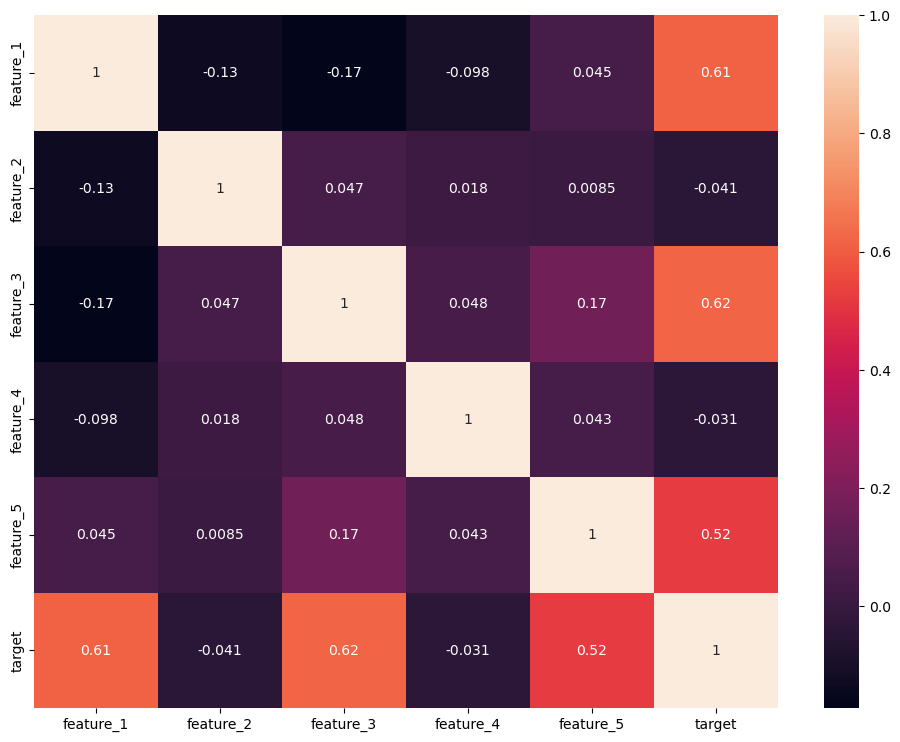

In [42]:
plt.figure(figsize=(12,9))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

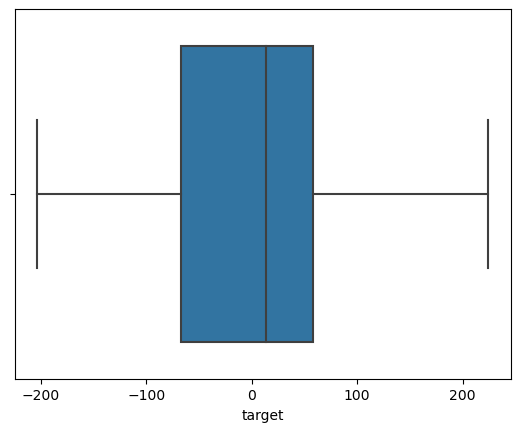

In [43]:
sns.boxplot(x=dataset['target'])
plt.show()

In [44]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(dataset)
dataset = imp.transform(dataset)


In [47]:
dataset

array([[-4.21799514e-02,  2.09238728e+00,  5.95157025e-01,
        -1.00601738e+00, -8.18220683e-01,  1.10988378e+01],
       [-4.21799514e-02,  1.76545424e+00, -4.74945311e-01,
         4.04981711e-01, -6.53329233e-01, -7.19796996e+01],
       [-4.21799514e-02, -1.05771093e+00,  1.85227818e+00,
         8.22544912e-01, -1.34972247e-02,  6.63781209e+01],
       [-4.21799514e-02, -1.19130350e+00,  1.86577451e+00,
         6.56553609e-01,  4.73832921e-01,  7.72262067e+01],
       [-4.21799514e-02,  9.17607765e-02,  8.70470682e-02,
        -1.98756891e+00, -2.99007350e-01,  4.74090038e+01],
       [-4.21799514e-02,  2.03463636e-01, -9.55540441e-01,
        -7.56350745e-01, -1.60644632e+00, -1.20007621e+02],
       [-4.21799514e-02,  9.50423838e-01,  3.41755976e-01,
        -5.76903656e-01,  1.87617084e+00,  9.60307129e+01],
       [-4.21799514e-02,  1.05380205e+00,  5.60784526e-01,
        -1.37766937e+00,  1.08305124e+00,  9.36855668e+01],
       [-4.21799514e-02,  9.76760985e-02,  2.240

Training set:
Mean Squared Error: 389.4279170347951
R-squared: 0.9513239876182703

Test set:
Mean Squared Error: 746.9338487359778
R-squared: 0.8264760565447544


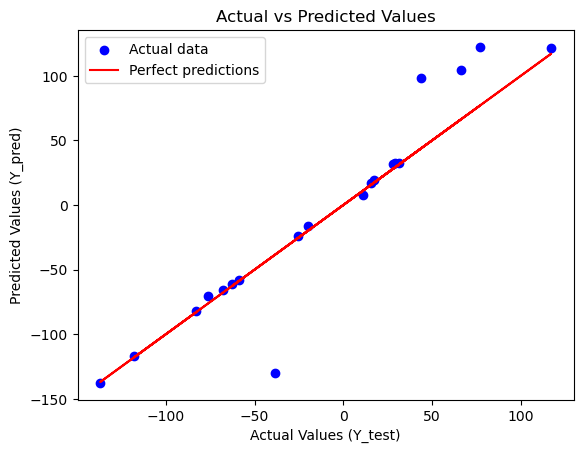

In [54]:
X = dataset[:, :-1]
y = dataset[:, -1]

# Splitting the data into trainin"g and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Importing the Linear Regression model
from sklearn.linear_model import LinearRegression

# Initializing the Linear Regression model
model = LinearRegression()

# Training the model
model.fit(X_train, Y_train)

# Making predictions on both the training and test sets
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Evaluating the model (you can use different metrics depending on your problem)
from sklearn.metrics import mean_squared_error, r2_score


# Evaluating the model on both sets
mse_train = mean_squared_error(Y_train, Y_train_pred)
r2_train = r2_score(Y_train, Y_train_pred)
mse_test = mean_squared_error(Y_test, Y_test_pred)
r2_test = r2_score(Y_test, Y_test_pred)

print("Training set:")
print(f"Mean Squared Error: {mse_train}")
print(f"R-squared: {r2_train}")

print("\nTest set:")
print(f"Mean Squared Error: {mse_test}")
print(f"R-squared: {r2_test}")


# You can also visualize the predictions against the actual values
import matplotlib.pyplot as plt

plt.scatter(Y_test, Y_pred, color='blue', label='Actual data')
plt.plot(Y_test, Y_test, color='red', label='Perfect predictions')  # Adding a line for perfect predictions
plt.xlabel("Actual Values (Y_test)")
plt.ylabel("Predicted Values (Y_pred)")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()


Mean Squared Error: 804.5581900023219
R-squared: 0.7928938952839395


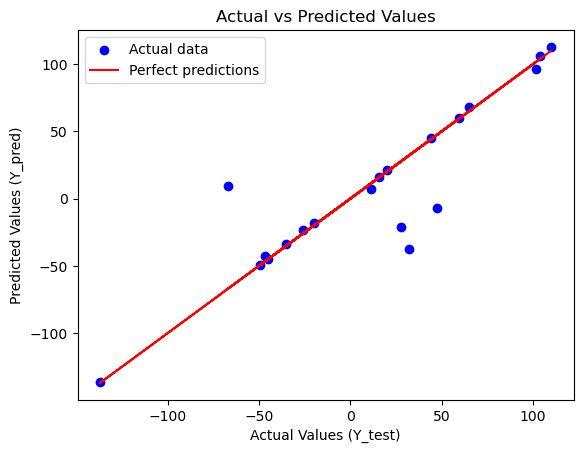